In [1]:
from keras.models import Sequential,Model,Input
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D,Input,Concatenate,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

trainPath="/content/drive/MyDrive/DerinOgrenme/train"
testPath="/content/drive/MyDrive/DerinOgrenme/test"
valPath="/content/drive/MyDrive/DerinOgrenme/val"

trainDataGen=ImageDataGenerator( rescale=1./255)
trainGen=trainDataGen.flow_from_directory(
    trainPath,
    target_size=(224,224),
    class_mode='categorical')

testGen=trainDataGen.flow_from_directory(
    testPath,
    target_size=(224,224),
    class_mode='categorical')

valGen=trainDataGen.flow_from_directory(
    valPath,
    target_size=(224,224),
    class_mode='categorical')



Found 7364 images belonging to 4 classes.
Found 924 images belonging to 4 classes.
Found 920 images belonging to 4 classes.


In [4]:
!pip install efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 4.7 MB/s 


In [5]:
import efficientnet.keras as efn
from tensorflow.keras.callbacks import Callback
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import Recall, Precision
import tensorflow as tf

In [ ]:

pretrained_base = tf.keras.applications.EfficientNetV2M(
    include_top = False,
    input_shape = (224, 224, 3),
    weights = "imagenet"
)
# Eğitilmiş noktalarda dondurma yapılır
pretrained_base.trainable = False;

model = tf.keras.Sequential([
    pretrained_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='softmax'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.summary()



214212608/214201816 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-m (Functiona  (None, 7, 7, 1280)       53150388  
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                       

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss='categorical_crossentropy',
    metrics='accuracy'
)

history = model.fit(trainGen,
                    epochs = 5, 
                    validation_data =valGen,
                    workers = 8, # Eğitimimizi potansiyel olarak hızlandırmak için daha yüksek çalışan sayısı
                    verbose = 1,
                    )


Epoch 1/5
231/231 [==============================] - 340s 1s/step - loss: 1.3301 - accuracy: 0.3665 - val_loss: 1.3015 - val_accuracy: 0.3957
Epoch 2/5
231/231 [==============================] - 176s 723ms/step - loss: 1.2778 - accuracy: 0.4235 - val_loss: 1.2225 - val_accuracy: 0.5293
Epoch 3/5
231/231 [==============================] - 173s 722ms/step - loss: 1.2115 - accuracy: 0.4522 - val_loss: 1.1562 - val_accuracy: 0.5641
Epoch 4/5
231/231 [==============================] - 178s 731ms/step - loss: 1.1755 - accuracy: 0.4656 - val_loss: 1.1182 - val_accuracy: 0.5739
Epoch 5/5
231/231 [==============================] - 175s 742ms/step - loss: 1.1591 - accuracy: 0.4656 - val_loss: 1.0980 - val_accuracy: 0.5728


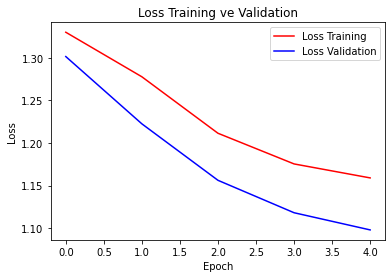

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'r', label='Loss Training')
plt.plot(history.history['val_loss'], 'b', label='Loss Validation')
plt.title('Loss Training ve Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.show()

**2. eğitim denemesi**


In [ ]:
pretrained_base = tf.keras.applications.EfficientNetV2M(
    include_top = False,
    input_shape = (224, 224, 3),
    weights = "imagenet"
)
# Eğitilmiş noktalarda dondurma yapılır
pretrained_base.trainable = False;

model2 = tf.keras.Sequential([
    pretrained_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='softmax'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation='softmax')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-m (Functiona  (None, 7, 7, 1280)       53150388  
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 128)               163968    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 53,314,872
Trainable params: 164,484
Non

In [ ]:
model2.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss='categorical_crossentropy',
    metrics='accuracy'
)

history = model.fit(trainGen,
                    epochs = 15, 
                    validation_data =valGen,
                    workers = 8, # Eğitimimizi potansiyel olarak hızlandırmak için daha yüksek çalışan sayısı
                    verbose = 1,
                    )

Epoch 1/15
231/231 [==============================] - 175s 738ms/step - loss: 1.1450 - accuracy: 0.4741 - val_loss: 1.0752 - val_accuracy: 0.5837
Epoch 2/15
231/231 [==============================] - 172s 707ms/step - loss: 1.1270 - accuracy: 0.4925 - val_loss: 1.0659 - val_accuracy: 0.5815
Epoch 3/15
231/231 [==============================] - 168s 711ms/step - loss: 1.1125 - accuracy: 0.5000 - val_loss: 1.0537 - val_accuracy: 0.5804
Epoch 4/15
231/231 [==============================] - 173s 732ms/step - loss: 1.1043 - accuracy: 0.5033 - val_loss: 1.0354 - val_accuracy: 0.5783
Epoch 5/15
231/231 [==============================] - 175s 722ms/step - loss: 1.0976 - accuracy: 0.5090 - val_loss: 1.0258 - val_accuracy: 0.5826
Epoch 6/15
231/231 [==============================] - 175s 725ms/step - loss: 1.0931 - accuracy: 0.5174 - val_loss: 1.0228 - val_accuracy: 0.5837
Epoch 7/15
231/231 [==============================] - 174s 716ms/step - loss: 1.0787 - accuracy: 0.5276 - val_loss: 1.0127 -

In [ ]:
pretrained_base.trainable = True

# Katmanlarda dondurma yapıyoruz
for layer in pretrained_base.layers[:-45]:
    layer.trainable = False

In [ ]:
# modeli yeniden derliyoruz
model2.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
history_model_2_fine_tune = model2.fit(trainGen, 
                                      epochs=30, 
                                      validation_data=valGen, 
                                      initial_epoch=14 
                                      )

Epoch 15/30
231/231 [==============================] - 255s 1s/step - loss: 0.6100 - accuracy: 0.4961 - val_loss: 0.5632 - val_accuracy: 0.6207
Epoch 16/30
231/231 [==============================] - 226s 980ms/step - loss: 0.5444 - accuracy: 0.5481 - val_loss: 0.5273 - val_accuracy: 0.5685
Epoch 17/30
231/231 [==============================] - 216s 934ms/step - loss: 0.4960 - accuracy: 0.5856 - val_loss: 0.4620 - val_accuracy: 0.7054
Epoch 18/30
231/231 [==============================] - 214s 927ms/step - loss: 0.4700 - accuracy: 0.5843 - val_loss: 0.4515 - val_accuracy: 0.6543
Epoch 19/30
231/231 [==============================] - 213s 922ms/step - loss: 0.4481 - accuracy: 0.5990 - val_loss: 0.4191 - val_accuracy: 0.6978
Epoch 20/30
231/231 [==============================] - 213s 923ms/step - loss: 0.4337 - accuracy: 0.5979 - val_loss: 0.3957 - val_accuracy: 0.7174
Epoch 21/30
231/231 [==============================] - 215s 930ms/step - loss: 0.4205 - accuracy: 0.6010 - val_loss: 0.38

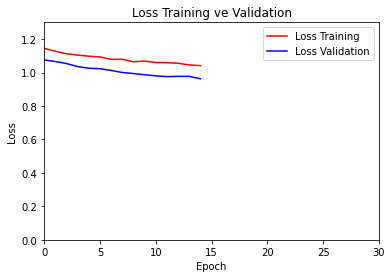

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'r', label='Loss Training')
plt.plot(history.history['val_loss'], 'b', label='Loss Validation')
plt.title('Loss Training ve Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.axis([0,30,0,1.3])
plt.legend(loc=0)
plt.show()

**model 3**

In [ ]:
pretrained_base = tf.keras.applications.EfficientNetV2M(
    include_top = False,
    input_shape = (224, 224, 3),
    weights = "imagenet"
)
# Eğitilmiş noktalarda dondurma yapılır
pretrained_base.trainable = False;

model3 = tf.keras.Sequential([
    pretrained_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4, activation='softmax')
])
model3.summary()

214212608/214201816 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-m (Functiona  (None, 7, 7, 1280)       53150388  
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                       

In [ ]:
# Early Stopping çağrı noktası ayarlıyoruz categorical_crossentropy
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='sigmoid',
                                                 patience=1)

In [ ]:
model3.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss='binary_crossentropy',
    metrics='accuracy'
)

history = model3.fit(trainGen,
                    epochs = 10, 
                    validation_data =valGen,
                    workers = 8, # Eğitimimizi potansiyel olarak hızlandırmak için daha yüksek çalışan sayısı
                    verbose = 1, callbacks=[early_stopping]
                    )

Epoch 1/10
231/231 [==============================] - 355s 1s/step - loss: 0.5345 - accuracy: 0.3992 - val_loss: 0.4958 - val_accuracy: 0.4696
Epoch 2/10
231/231 [==============================] - 175s 739ms/step - loss: 0.4885 - accuracy: 0.5030 - val_loss: 0.4606 - val_accuracy: 0.5739
Epoch 3/10
231/231 [==============================] - 173s 734ms/step - loss: 0.4609 - accuracy: 0.5473 - val_loss: 0.4378 - val_accuracy: 0.5793
Epoch 4/10
231/231 [==============================] - 179s 722ms/step - loss: 0.4404 - accuracy: 0.5716 - val_loss: 0.4221 - val_accuracy: 0.6043
Epoch 5/10
231/231 [==============================] - 179s 739ms/step - loss: 0.4297 - accuracy: 0.5864 - val_loss: 0.4131 - val_accuracy: 0.5913
Epoch 6/10
231/231 [==============================] - 175s 733ms/step - loss: 0.4218 - accuracy: 0.5944 - val_loss: 0.4076 - val_accuracy: 0.6261
Epoch 7/10
231/231 [==============================] - 174s 740ms/step - loss: 0.4164 - accuracy: 0.5970 - val_loss: 0.4005 - va

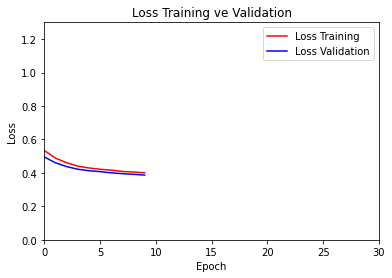

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'r', label='Loss Training')
plt.plot(history.history['val_loss'], 'b', label='Loss Validation')
plt.title('Loss Training ve Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.axis([0,30,0,1.3])
plt.legend(loc=0)
plt.show()

In [ ]:
pretrained_base.trainable = True

# Katmanlarda dondurma yapıyoruz
for layer in pretrained_base.layers[:-35]:
    layer.trainable = False

In [ ]:
# modeli yeniden derliyoruz
model3.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
history_model_3_fine_tune = model3.fit(trainGen, 
                                      epochs=25, 
                                      validation_data=valGen, 
                                      initial_epoch=9
                                      )

Epoch 10/25
231/231 [==============================] - 238s 958ms/step - loss: 0.3998 - accuracy: 0.6573 - val_loss: 0.3657 - val_accuracy: 0.6957
Epoch 11/25
231/231 [==============================] - 218s 943ms/step - loss: 0.3220 - accuracy: 0.7091 - val_loss: 0.2871 - val_accuracy: 0.7598
Epoch 12/25
231/231 [==============================] - 218s 945ms/step - loss: 0.2961 - accuracy: 0.7389 - val_loss: 0.2802 - val_accuracy: 0.7609
Epoch 13/25
231/231 [==============================] - 219s 948ms/step - loss: 0.2787 - accuracy: 0.7515 - val_loss: 0.3038 - val_accuracy: 0.6717
Epoch 14/25
231/231 [==============================] - 219s 947ms/step - loss: 0.2677 - accuracy: 0.7590 - val_loss: 0.4875 - val_accuracy: 0.6228
Epoch 15/25
231/231 [==============================] - 218s 944ms/step - loss: 0.2638 - accuracy: 0.7629 - val_loss: 0.3849 - val_accuracy: 0.6413
Epoch 16/25
231/231 [==============================] - 216s 936ms/step - loss: 0.2521 - accuracy: 0.7825 - val_loss: 0

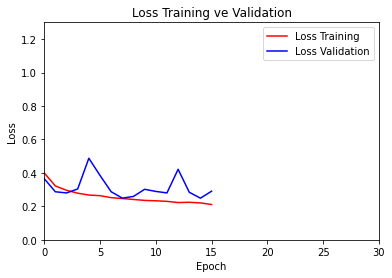

In [ ]:
import matplotlib
import matplotlib.pyplot as plt1
plt1.plot(history_model_3_fine_tune.history['loss'], 'r', label='Loss Training')
plt1.plot(history_model_3_fine_tune.history['val_loss'], 'b', label='Loss Validation')
plt1.title('Loss Training ve Validation')
plt1.ylabel('Loss')
plt1.xlabel('Epoch')
plt1.axis([0,30,0,1.3])
plt1.legend(loc=1)
plt1.show()

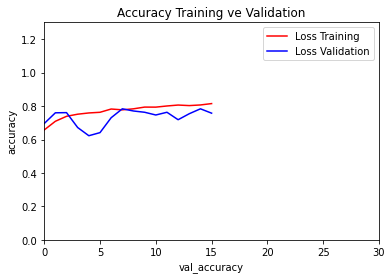

In [ ]:
import matplotlib
import matplotlib.pyplot as plt1
plt1.plot(history_model_3_fine_tune.history['accuracy'], 'r', label='Loss Training')
plt1.plot(history_model_3_fine_tune.history['val_accuracy'], 'b', label='Loss Validation')
plt1.title('Accuracy Training ve Validation')
plt1.ylabel('accuracy')
plt1.xlabel('val_accuracy')
plt1.axis([0,30,0,1.3])
plt1.legend(loc=1)
plt1.show()

**MODEL 4 **

In [6]:
pretrained_base = tf.keras.applications.EfficientNetV2M(
    include_top = False,
    input_shape = (224, 224, 3),
    weights = "imagenet"
)
# Eğitilmiş noktalarda dondurma yapılır
pretrained_base.trainable = False;

model4 = tf.keras.Sequential([
    pretrained_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4, activation='softmax')
])
model4.summary()

214212608/214201816 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-m (Functiona  (None, 7, 7, 1280)       53150388  
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                       

In [7]:
# Early Stopping çağrı noktası ayarlıyoruz categorical_crossentropy
early_stopping1 = tf.keras.callbacks.EarlyStopping(monitor='accuary',
                                                 patience=1)

In [8]:
model4.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss='binary_crossentropy',
    metrics='accuracy'
)

history = model4.fit(trainGen,
                    epochs = 30, 
                    validation_data =valGen,
                    workers = 8, # Eğitimimizi potansiyel olarak hızlandırmak için daha yüksek çalışan sayısı
                    verbose = 1, callbacks=[early_stopping1]
                    )

Epoch 1/30
231/231 [==============================] - 310s 1s/step - loss: 0.5348 - accuracy: 0.4078 - val_loss: 0.4928 - val_accuracy: 0.5413
Epoch 2/30
231/231 [==============================] - 172s 730ms/step - loss: 0.4915 - accuracy: 0.4906 - val_loss: 0.4659 - val_accuracy: 0.5185
Epoch 3/30
231/231 [==============================] - 172s 732ms/step - loss: 0.4606 - accuracy: 0.5406 - val_loss: 0.4368 - val_accuracy: 0.5717
Epoch 4/30
231/231 [==============================] - 177s 724ms/step - loss: 0.4432 - accuracy: 0.5607 - val_loss: 0.4212 - val_accuracy: 0.5848
Epoch 5/30
231/231 [==============================] - 172s 726ms/step - loss: 0.4311 - accuracy: 0.5813 - val_loss: 0.4120 - val_accuracy: 0.6141
Epoch 6/30
231/231 [==============================] - 174s 722ms/step - loss: 0.4217 - accuracy: 0.5899 - val_loss: 0.4096 - val_accuracy: 0.5978
Epoch 7/30
231/231 [==============================] - 174s 733ms/step - loss: 0.4151 - accuracy: 0.6024 - val_loss: 0.4000 - va

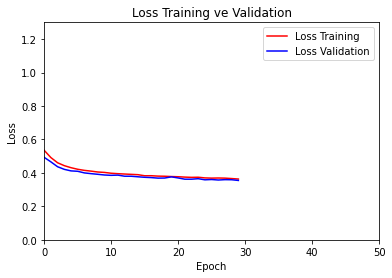

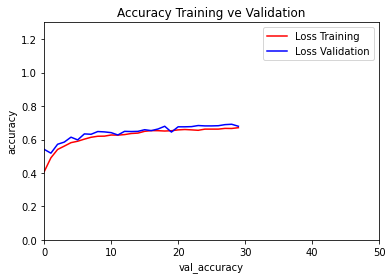

In [10]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'r', label='Loss Training')
plt.plot(history.history['val_loss'], 'b', label='Loss Validation')
plt.title('Loss Training ve Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.axis([0,50,0,1.3])
plt.legend(loc=0)
plt.show()

plt.plot(history.history['accuracy'], 'r', label='Loss Training')
plt.plot(history.history['val_accuracy'], 'b', label='Loss Validation')
plt.title('Accuracy Training ve Validation')
plt.ylabel('accuracy')
plt.xlabel('val_accuracy')
plt.axis([0,50,0,1.3])
plt.legend(loc=1)
plt.show()


In [54]:
    from sklearn import datasets
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report, confusion_matrix
    wine = datasets.load_wine()
    X = wine.data
    y = wine.target
    class_names = wine.target_names
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    classifier_tree = DecisionTreeClassifier()
    y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)
    print(classification_report(y_test, y_predict, target_names=class_names))
    print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

     class_0       0.90      0.75      0.82        12
     class_1       0.87      0.87      0.87        23
     class_2       0.90      1.00      0.95        19

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54

[[ 9  3  0]
 [ 1 20  2]
 [ 0  0 19]]


In [11]:
pretrained_base.trainable = True

# Katmanlarda dondurma yapıyoruz
for layer in pretrained_base.layers[:-75]:
    layer.trainable = False

In [12]:
# modeli yeniden derliyoruz
model4.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [13]:
history_model_4_fine_tune = model4.fit(trainGen, 
                                      epochs=50, 
                                      validation_data=valGen, 
                                      initial_epoch=29,callbacks=[early_stopping1]
                                      )

Epoch 30/50
231/231 [==============================] - 238s 950ms/step - loss: 0.4574 - accuracy: 0.6529 - val_loss: 0.3877 - val_accuracy: 0.6391
Epoch 31/50
231/231 [==============================] - 216s 934ms/step - loss: 0.3125 - accuracy: 0.7288 - val_loss: 0.2803 - val_accuracy: 0.7696
Epoch 32/50
231/231 [==============================] - 216s 940ms/step - loss: 0.2859 - accuracy: 0.7514 - val_loss: 0.2647 - val_accuracy: 0.7924
Epoch 33/50
231/231 [==============================] - 216s 934ms/step - loss: 0.2692 - accuracy: 0.7710 - val_loss: 0.2966 - val_accuracy: 0.7348
Epoch 34/50
231/231 [==============================] - 217s 941ms/step - loss: 0.2453 - accuracy: 0.7800 - val_loss: 0.2317 - val_accuracy: 0.8130
Epoch 35/50
231/231 [==============================] - 217s 937ms/step - loss: 0.2326 - accuracy: 0.7970 - val_loss: 0.3201 - val_accuracy: 0.7293
Epoch 36/50
231/231 [==============================] - 216s 933ms/step - loss: 0.2318 - accuracy: 0.8016 - val_loss: 0

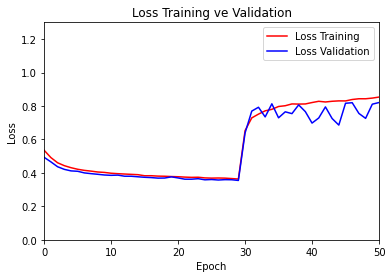

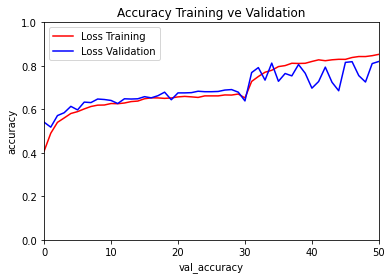

In [15]:
import matplotlib
import matplotlib.pyplot as plt2

plt2.plot(history.history['loss']+history_model_4_fine_tune.history['accuracy'], 'r', label='Loss Training')
plt2.plot(history.history['val_loss']+history_model_4_fine_tune.history['val_accuracy'], 'b', label='Loss Validation')
plt2.title('Loss Training ve Validation')
plt2.ylabel('Loss')
plt2.xlabel('Epoch')
plt2.axis([0,50,0,1.3])
plt2.legend()
plt2.show()

plt2.plot(history.history['accuracy']+history_model_4_fine_tune.history['accuracy'], 'r', label='Loss Training')
plt2.plot(history.history['val_accuracy']+history_model_4_fine_tune.history['val_accuracy'], 'b', label='Loss Validation')
plt2.title('Accuracy Training ve Validation')
plt2.ylabel('accuracy')
plt2.xlabel('val_accuracy')
plt2.axis([0,50,0,1])
plt2.legend(loc='best')
plt2.show()

In [53]:
    from sklearn import datasets
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report, confusion_matrix

In [52]:
    wine = datasets.load_wine()
    X = wine.data
    y = wine.target
    class_names = wine.target_names
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    classifier_tree = DecisionTreeClassifier()
    y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)
    print(classification_report(y_test, y_predict, target_names=class_names))
    print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

     class_0       0.90      0.95      0.92        19
     class_1       0.92      0.71      0.80        17
     class_2       0.86      1.00      0.92        18

    accuracy                           0.89        54
   macro avg       0.89      0.88      0.88        54
weighted avg       0.89      0.89      0.88        54

[[18  1  0]
 [ 2 12  3]
 [ 0  0 18]]


**model 5**

In [29]:
from tensorflow.keras import regularizers
pretrained_base = tf.keras.applications.EfficientNetV2M(
    include_top = False,
    input_shape = (224, 224, 3),
    weights = "imagenet"
)
# Eğitilmiş noktalarda dondurma yapılır
pretrained_base.trainable = False;

model5 = tf.keras.Sequential([
    pretrained_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(64, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L2(1e-4), activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4, activation='softmax'),
   ])
model5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-m (Functiona  (None, 7, 7, 1280)       53150388  
 l)                                                              
                                                                 
 global_average_pooling2d_5   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_13 (Dense)            (None, 128)               163968    
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 4)                

In [30]:
# Early Stopping çağrı noktası ayarlıyoruz categorical_crossentropy
early_stopping1 = tf.keras.callbacks.EarlyStopping(monitor='accuary',
                                                 patience=1)

In [32]:
model5.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss='binary_crossentropy',
    metrics='accuracy'
)

history5 = model5.fit(trainGen,
                    epochs = 30, 
                    validation_data =valGen,
                    workers = 8, # Eğitimimizi potansiyel olarak hızlandırmak için daha yüksek çalışan sayısı
                    verbose = 1, callbacks=[early_stopping1]
                    )

Epoch 1/30
231/231 [==============================] - 215s 835ms/step - loss: 0.5425 - accuracy: 0.4125 - val_loss: 0.4939 - val_accuracy: 0.4674
Epoch 2/30
231/231 [==============================] - 189s 789ms/step - loss: 0.4718 - accuracy: 0.5534 - val_loss: 0.4479 - val_accuracy: 0.5685
Epoch 3/30
231/231 [==============================] - 177s 727ms/step - loss: 0.4415 - accuracy: 0.5899 - val_loss: 0.4510 - val_accuracy: 0.5380
Epoch 4/30
231/231 [==============================] - 172s 728ms/step - loss: 0.4330 - accuracy: 0.6050 - val_loss: 0.4115 - val_accuracy: 0.6239
Epoch 5/30
231/231 [==============================] - 173s 729ms/step - loss: 0.4206 - accuracy: 0.6209 - val_loss: 0.4044 - val_accuracy: 0.6565
Epoch 6/30
231/231 [==============================] - 180s 740ms/step - loss: 0.4100 - accuracy: 0.6381 - val_loss: 0.4042 - val_accuracy: 0.6478
Epoch 7/30
231/231 [==============================] - 177s 734ms/step - loss: 0.4050 - accuracy: 0.6415 - val_loss: 0.3906 -

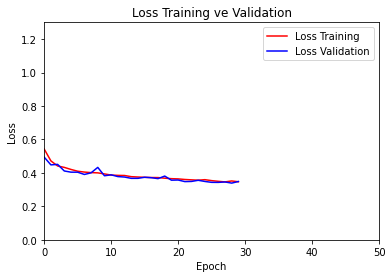

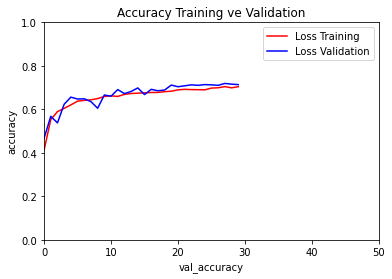

In [37]:
import matplotlib
import matplotlib.pyplot as plt5

plt5.plot(history.history['loss'], 'r', label='Loss Training')
plt5.plot(history.history['val_loss'], 'b', label='Loss Validation')
plt5.title('Loss Training ve Validation')
plt5.ylabel('Loss')
plt5.xlabel('Epoch')
plt5.axis([0,50,0,1.3])
plt5.legend()
plt5.show()

plt5.plot(history.history['accuracy'], 'r', label='Loss Training')
plt5.plot(history.history['val_accuracy'], 'b', label='Loss Validation')
plt5.title('Accuracy Training ve Validation')
plt5.ylabel('accuracy')
plt5.xlabel('val_accuracy')
plt5.axis([0,50,0,1])
plt5.legend(loc='best')
plt5.show()

In [55]:
    from sklearn import datasets
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report, confusion_matrix
    wine = datasets.load_wine()
    X = wine.data
    y = wine.target
    class_names = wine.target_names
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    classifier_tree = DecisionTreeClassifier()
    y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)
    print(classification_report(y_test, y_predict, target_names=class_names))
    print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        16
     class_1       0.85      0.89      0.87        19
     class_2       0.89      0.84      0.86        19

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54

[[16  0  0]
 [ 0 17  2]
 [ 0  3 16]]


In [38]:
pretrained_base.trainable = True

# Katmanlarda dondurma yapıyoruz
for layer in pretrained_base.layers[:-75]:
    layer.trainable = False

In [39]:
# modeli yeniden derliyoruz
model5.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [40]:
history_model_5_fine_tune = model5.fit(trainGen, 
                                      epochs=50, 
                                      validation_data=valGen, 
                                      initial_epoch=29,callbacks=[early_stopping1]
                                      )

Epoch 30/50
231/231 [==============================] - 252s 1s/step - loss: 0.5224 - accuracy: 0.6801 - val_loss: 1.2942 - val_accuracy: 0.3783
Epoch 31/50
231/231 [==============================] - 229s 992ms/step - loss: 0.3121 - accuracy: 0.7371 - val_loss: 0.3299 - val_accuracy: 0.7478
Epoch 32/50
231/231 [==============================] - 227s 982ms/step - loss: 0.2917 - accuracy: 0.7598 - val_loss: 0.2926 - val_accuracy: 0.7674
Epoch 33/50
231/231 [==============================] - 226s 981ms/step - loss: 0.2651 - accuracy: 0.7830 - val_loss: 0.2765 - val_accuracy: 0.7761
Epoch 34/50
231/231 [==============================] - 229s 989ms/step - loss: 0.2664 - accuracy: 0.7768 - val_loss: 0.2707 - val_accuracy: 0.7620
Epoch 35/50
231/231 [==============================] - 227s 980ms/step - loss: 0.2408 - accuracy: 0.8032 - val_loss: 0.2837 - val_accuracy: 0.7304
Epoch 36/50
231/231 [==============================] - 224s 970ms/step - loss: 0.2340 - accuracy: 0.8064 - val_loss: 0.28

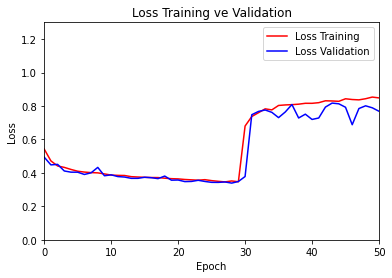

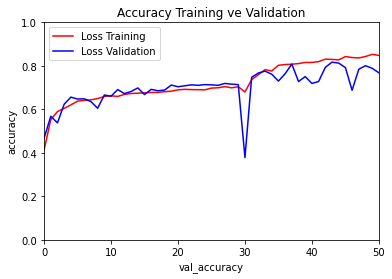

In [42]:
plt5.plot(history.history['loss']+history_model_5_fine_tune.history['accuracy'], 'r', label='Loss Training')
plt5.plot(history.history['val_loss']+history_model_5_fine_tune.history['val_accuracy'], 'b', label='Loss Validation')
plt5.title('Loss Training ve Validation')
plt5.ylabel('Loss')
plt5.xlabel('Epoch')
plt5.axis([0,50,0,1.3])
plt5.legend()
plt5.show()

plt5.plot(history.history['accuracy']+history_model_5_fine_tune.history['accuracy'], 'r', label='Loss Training')
plt5.plot(history.history['val_accuracy']+history_model_5_fine_tune.history['val_accuracy'], 'b', label='Loss Validation')
plt5.title('Accuracy Training ve Validation')
plt5.ylabel('accuracy')
plt5.xlabel('val_accuracy')
plt5.axis([0,50,0,1])
plt5.legend(loc='best')
plt5.show()

In [49]:
    from sklearn import datasets
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report, confusion_matrix


In [50]:
    wine = datasets.load_wine()
    X = wine.data
    y = wine.target
    class_names = wine.target_names
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    classifier_tree = DecisionTreeClassifier()
    y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)
    print(classification_report(y_test, y_predict, target_names=class_names))
    print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        17
     class_1       0.93      0.88      0.90        16
     class_2       0.91      0.95      0.93        21

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.94      0.94      0.94        54

[[17  0  0]
 [ 0 14  2]
 [ 0  1 20]]
